In [1]:
# pip install git+https://github.com/AltamarMx/iertools.git

In [2]:
import pandas as pd
from iertools.read import read_epw
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calplot
import matplotlib.ticker as ticker
from windrose import WindroseAxes

plt.style.use('../notebooks/enerdata_rectangle.mplstyle')

In [3]:
f = "../epw/Temixco_2018CST.epw"
tmx = read_epw(f,alias=True)
tmx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52560 entries, 2018-01-01 00:10:00 to 2018-12-31 23:00:00
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Data Source and Uncertainty Flags         52559 non-null  object 
 1   To                                        52560 non-null  float64
 2   Dew Point Temperature                     52560 non-null  float64
 3   RH                                        52560 non-null  int64  
 4   P                                         52560 non-null  int64  
 5   Extraterrestrial Horizontal Radiation     52560 non-null  float64
 6   Extraterrestrial Direct Normal Radiation  52560 non-null  float64
 7   Horizontal Infrared Radiation Intensity   52560 non-null  float64
 8   Ig                                        52560 non-null  float64
 9   Ib                                        52560 non-null  float64
 10 

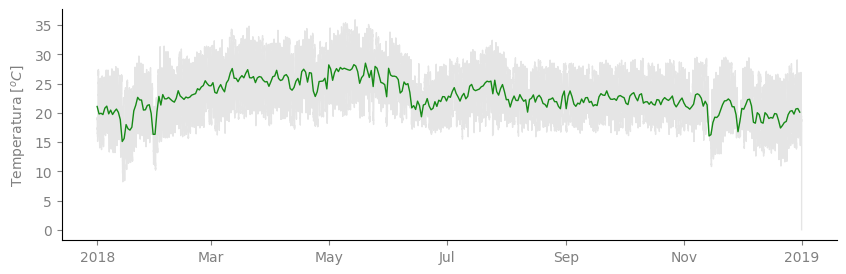

In [4]:
fig, ax = plt.subplots(figsize=(10,3))

ax.plot(tmx.To,"k-",alpha=0.1)
ax.plot(tmx.To.resample("D").mean(),"g-",alpha=0.9)

ax.set_ylabel("Temperatura [$^oC$]")
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

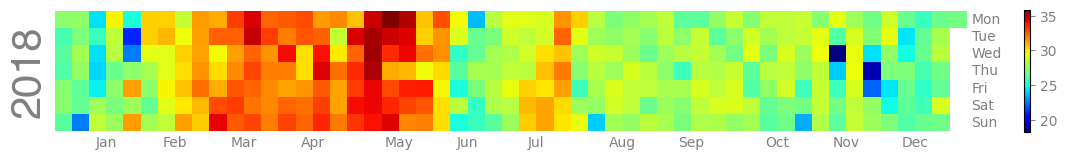

In [5]:
calplot.calplot(tmx.To.resample('D').max(),
                linewidth=0,
                cmap='jet',
                colorbar=None);

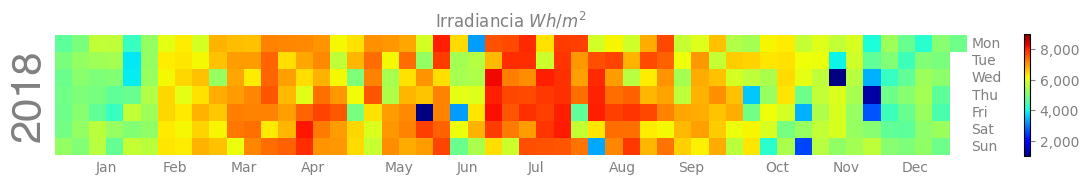

In [6]:
cal, cax =calplot.calplot(tmx.Ig.resample('D').sum()*1/6,
                          linewidth=0,
                          cmap='jet',colorbar=None,
                          vmin=1000,
                          vmax=9000);

cal.axes[0].set_title('Irradiancia $Wh/m^2$');

def format_func(x, pos):
    return f'{x:,.0f}'  # Añade separadores de miles, sin decimales

# Usa FuncFormatter con la función de formato definida anteriormente
formatter = ticker.FuncFormatter(format_func)

# Aplica el formatter al colorbar
cax = plt.gcf().axes[-1]  # Asumiendo que el colorbar es el último eje añadido
cax.yaxis.set_major_formatter(formatter)

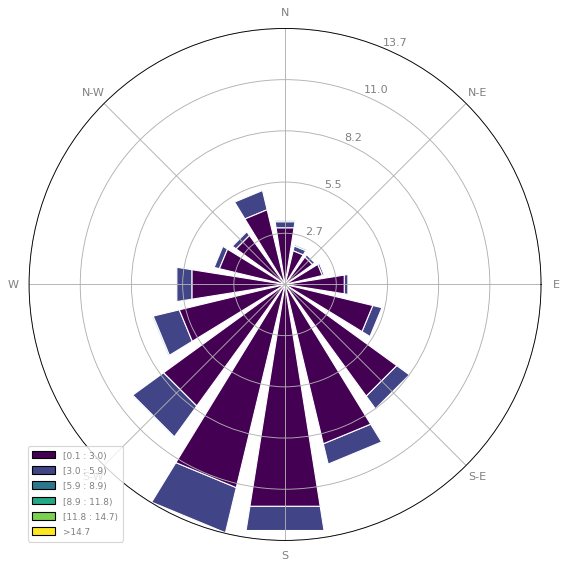

In [7]:
dia = tmx.between_time("08:00:00","20:00:00")
ax = WindroseAxes.from_ax()
ax.bar(dia.Wd, dia.Ws, normed=True, 
       opening=0.8, 
       edgecolor="white",bins=6)
ax.set_legend();

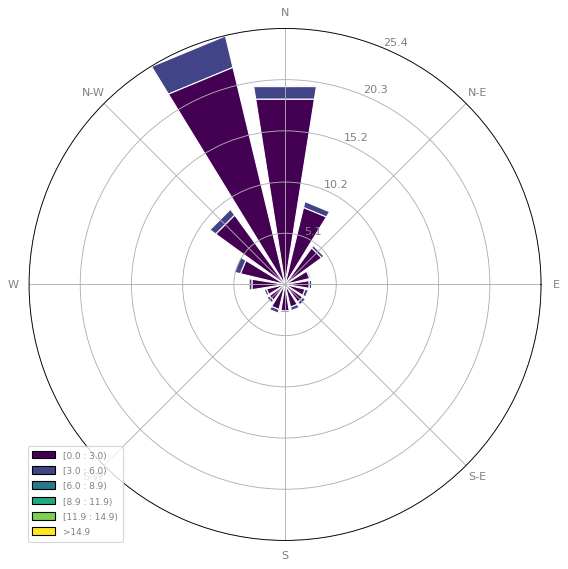

In [8]:
noche = tmx.between_time("20:00:00","08:00:00")
ax = WindroseAxes.from_ax()
ax.bar(noche.Wd, noche.Ws, normed=True, 
       opening=0.8, 
       edgecolor="white",bins=6)
ax.set_legend();